In [4]:
import numpy as np
import matplotlib.pyplot as plt

class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Initialize weights randomly with Xavier initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        return self.z2

    def backward(self, X, y, learning_rate):
        dLoss_dZ2 = self.z2 - y
        dLoss_dW2 = np.dot(dLoss_dZ2, self.a1.T)
        dLoss_dA1 = np.dot(self.W2, dLoss_dZ2.T)
        dLoss_dZ1 = (self.a1 > 0).T * dLoss_dA1
        dLoss_dW1 = np.dot(dLoss_dZ1, X)

        self.W2 -= learning_rate * dLoss_dW2 
        self.W1 -= learning_rate * dLoss_dW1

    def train(self, X, y, num_epochs, learning_rate):
        loss_history = []

        for epoch in range(num_epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}")

        return loss_history

# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 4
output_size = 1
num_epochs = 1000
learning_rate = 0.1

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
loss_history = network.train(X, y, num_epochs, learning_rate)

# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

ValueError: shapes (4,1) and (4,4) not aligned: 1 (dim 1) != 4 (dim 0)

Mini-Batch

Epoch [100/5000], MSRE, RMSRE - Training: 0.999300, 0.999650 - Validation: 0.998869, 0.999434
Epoch [200/5000], MSRE, RMSRE - Training: 0.999229, 0.999614 - Validation: 0.998837, 0.999418
Epoch [300/5000], MSRE, RMSRE - Training: 0.999160, 0.999580 - Validation: 0.998805, 0.999402
Epoch [400/5000], MSRE, RMSRE - Training: 0.999092, 0.999546 - Validation: 0.998774, 0.999387
Epoch [500/5000], MSRE, RMSRE - Training: 0.999026, 0.999513 - Validation: 0.998742, 0.999371
Epoch [600/5000], MSRE, RMSRE - Training: 0.998961, 0.999480 - Validation: 0.998710, 0.999355
Epoch [700/5000], MSRE, RMSRE - Training: 0.998898, 0.999449 - Validation: 0.998679, 0.999339
Epoch [800/5000], MSRE, RMSRE - Training: 0.998836, 0.999418 - Validation: 0.998647, 0.999323
Epoch [900/5000], MSRE, RMSRE - Training: 0.998776, 0.999388 - Validation: 0.998615, 0.999307
Epoch [1000/5000], MSRE, RMSRE - Training: 0.998717, 0.999358 - Validation: 0.998584, 0.999292
Epoch [1100/5000], MSRE, RMSRE - Training: 0.998660, 0.9993

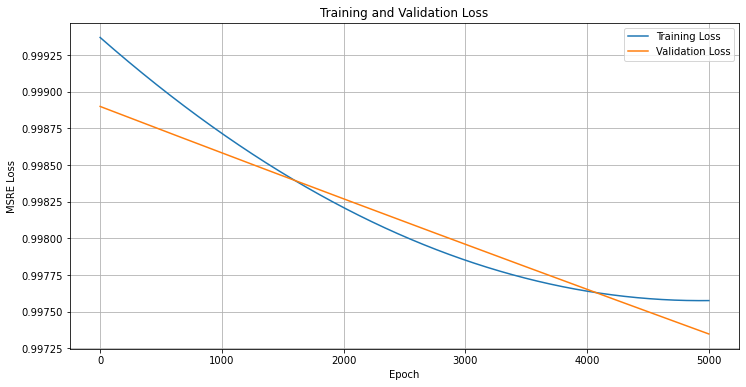

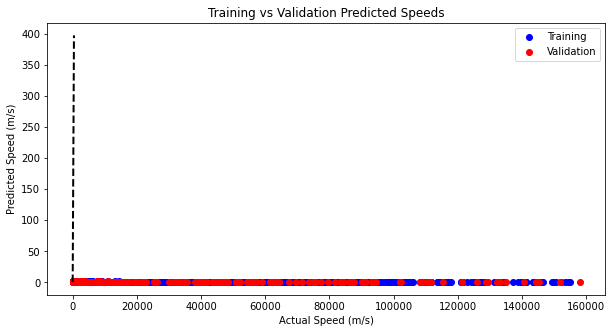

      id  expected
0      0  0.584229
1      1  1.078756
2      2  1.552361
3      3  1.005769
4      4  1.108164
..   ...       ...
195  195  1.224019
196  196  1.318298
197  197  0.413225
198  198  1.175133
199  199  2.192477

[200 rows x 2 columns]


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Constants
g = 9.80665  # Gravitational acceleration (m/s^2)

# Load data from CSV
data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lambda_w = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lambda_w))).T
y = c**2  # Target is c^2

# Normalize the features
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
X_scaled = (X - mean_X) / std_X

# Split the dataset into training and validation sets (80:20)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameters
input_size = 2
hidden_size = 16
output_size = 1
learning_rate = 1e-8  # Adjusted learning rate
batch_size = 64        # Reasonable batch size
epochs = 5000          # Reduced for quicker iteration

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros(output_size)

# Activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return (x > 0).astype(x.dtype)

# Mean Squared Relative Error Loss
def msre_loss(outputs, targets, epsilon=1e-8):
    return np.mean(((targets - outputs) / (targets + epsilon)) ** 2)

# Forward pass function
def forward(X):
    Z1 = X.dot(W1) + b1
    A1 = relu(Z1)
    Z2 = A1.dot(W2) + b2
    return Z1, A1, Z2

# Compute gradients function
def compute_gradients(X, y, A1, Z1, Z2):
    # Backpropagation
    dZ2 = 2 * (Z2 - y.reshape(-1, 1)) / y.reshape(-1, 1)
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0)
    
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0)
    
    return dW1, db1, dW2, db2

# Training loop with mini-batch SGD
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Shuffle the training set
    permutation = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, len(X_train), batch_size):
        # Mini-batch
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]
        
        # Forward pass
        Z1, A1, Z2 = forward(X_batch)
        
        # Compute loss
        loss = msre_loss(Z2, y_batch)
        
        # Backpropagation
        dW1, db1, dW2, db2 = compute_gradients(X_batch, y_batch, A1, Z1, Z2)
        
        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
    
    # Compute training loss
    _, _, Z2_train = forward(X_train)
    train_loss = msre_loss(Z2_train, y_train)
    train_losses.append(train_loss)
    
    # Compute validation loss
    _, _, Z2_val = forward(X_val)
    val_loss = msre_loss(Z2_val, y_val)
    val_losses.append(val_loss)
    
    if (epoch + 1) % 100 == 0:
        train_rmsre = np.sqrt(train_loss)  # Calculate RMSRE for reporting
        val_rmsre = np.sqrt(val_loss)
        print(f'Epoch [{epoch + 1}/{epochs}], MSRE, RMSRE - Training: {train_loss:.6f}, {train_rmsre:.6f} - Validation: {val_loss:.6f}, {val_rmsre:.6f}')

# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSRE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predictions and denormalization on training data
_, _, y_pred_train = forward(X_train)
predicted_speeds_train = np.sqrt(np.maximum(y_pred_train.flatten(), 0))

# Predictions and denormalization on validation data
_, _, y_pred_val = forward(X_val)
predicted_speeds_val = np.sqrt(np.maximum(y_pred_val.flatten(), 0))

# Visualization of training results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, predicted_speeds_train, color='blue', label='Training')
plt.scatter(y_val, predicted_speeds_val, color='red', label='Validation')
plt.plot([c.min(), c.max()], [c.min(), c.max()], 'k--', lw=2)
plt.xlabel('Actual Speed (m/s)')
plt.ylabel('Predicted Speed (m/s)')
plt.title('Training vs Validation Predicted Speeds')
plt.legend()
plt.show()

# Transform the verification data for the first approach
X_ver_1 = np.vstack((g * h_ver, g * np.sqrt(h_ver * lambda_w_ver))).T
X_ver_scaled_1 = (X_ver_1 - mean_X) / std_X

# Predict using the trained model for test data
_, _, y_pred_ver_1 = forward(X_ver_scaled_1)
expected_speed_1 = np.sqrt(np.maximum(y_pred_ver_1.flatten(), 0))

# Prepare the submission DataFrame
submission_1 = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed_1
})

# Print the submission DataFrame
print(submission_1)

In [19]:
np.sqrt(np.mean(((predicted_speeds-c)/c)**2))

0.2166533178488541

Regular Grad Descent

Epoch [5000/100000], Loss (MSRE): 0.511542, RMSRE: 0.715221
Epoch [10000/100000], Loss (MSRE): 0.767742, RMSRE: 0.876209
Epoch [15000/100000], Loss (MSRE): 0.825490, RMSRE: 0.908565
Epoch [20000/100000], Loss (MSRE): 0.961592, RMSRE: 0.980608
Epoch [25000/100000], Loss (MSRE): 0.887854, RMSRE: 0.942260
Epoch [30000/100000], Loss (MSRE): 0.810245, RMSRE: 0.900136
Epoch [35000/100000], Loss (MSRE): 0.757136, RMSRE: 0.870136
Epoch [40000/100000], Loss (MSRE): 0.699688, RMSRE: 0.836474
Epoch [45000/100000], Loss (MSRE): 0.630665, RMSRE: 0.794144
Epoch [50000/100000], Loss (MSRE): 0.709609, RMSRE: 0.842383
Epoch [55000/100000], Loss (MSRE): 0.586262, RMSRE: 0.765678
Epoch [60000/100000], Loss (MSRE): 0.485486, RMSRE: 0.696768
Epoch [65000/100000], Loss (MSRE): 0.550716, RMSRE: 0.742102
Epoch [70000/100000], Loss (MSRE): 0.622254, RMSRE: 0.788831
Epoch [75000/100000], Loss (MSRE): 0.889334, RMSRE: 0.943045
Epoch [80000/100000], Loss (MSRE): 1.174638, RMSRE: 1.083807
Epoch [85000/100000], Los

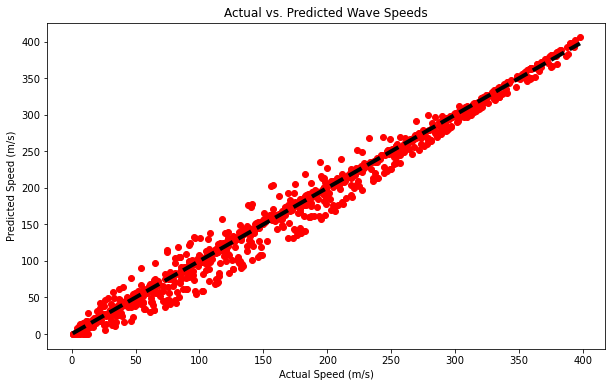

False
      id    expected
0      0  359.513785
1      1   43.351563
2      2   33.814088
3      3   59.397899
4      4  370.824341
..   ...         ...
195  195   29.304936
196  196   77.422849
197  197  189.037440
198  198   29.168777
199  199    8.244499

[200 rows x 2 columns]


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
g = 9.80665  # Gravitational acceleration (m/s^2)

# Load data from CSV
data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lambda_w = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lambda_w))).T
y = c**2  # Target is c^2

# Normalize the features
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
X_scaled = (X - mean_X) / std_X

# Initialize weights and biases
input_size = 2
hidden_size = 256
output_size = 1
learning_rate = 1e-1

# Randomly initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros(output_size)

# Activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return (x > 0).astype(x.dtype)

# Mean Squared Relative Error Loss
def msre_loss(outputs, targets, epsilon=1e-8):
    return np.mean(((targets - outputs) / (targets + epsilon)) ** 2)

def clip_gradient(grad, max_norm):
    norm = np.linalg.norm(grad)
    if norm > max_norm:
        grad = grad * (max_norm / norm)
    return grad

# Forward pass
def forward(X):
    Z1 = X.dot(W1) + b1
    A1 = relu(Z1)
    Z2 = A1.dot(W2) + b2
    return Z1, A1, Z2

# Training loop
epochs = 10000
losses = []

for epoch in range(epochs):
    Z1, A1, Z2 = forward(X_scaled)
    loss = msre_loss(Z2, y.reshape(-1, 1))
    losses.append(loss)
    
    dZ2 = 2 * (Z2 - y.reshape(-1, 1)) / y.reshape(-1, 1)
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0)
    
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X_scaled.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0)
    
    dW1 = clip_gradient(dW1, max_norm=1.0)
    db1 = clip_gradient(db1, max_norm=1.0)
    dW2 = clip_gradient(dW2, max_norm=1.0)
    db2 = clip_gradient(db2, max_norm=1.0)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    if (epoch + 1) % 5000 == 0:
        rmsre = np.sqrt(loss)  # Calculate RMSRE for reporting
        print(f'Epoch [{epoch + 1}/{epochs}], Loss (MSRE): {loss:.6f}, RMSRE: {rmsre:.6f}')

# Predictions and denormalization
_, _, y_pred = forward(X_scaled)
predicted_speeds = np.sqrt(np.maximum(y_pred.flatten(), 0))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(c, predicted_speeds, color='red')
plt.plot([c.min(), c.max()], [c.min(), c.max()], 'k--', lw=4)
plt.xlabel('Actual Speed (m/s)')
plt.ylabel('Predicted Speed (m/s)')
plt.title('Actual vs. Predicted Wave Speeds')
plt.show()

# Load the verification data
verification_data = pd.read_csv('water_waves_verification_data_input.csv')
h_ver = verification_data['h'].values
lambda_w_ver = verification_data['lam'].values

# Transform the verification data for the first approach
X_ver_1 = np.vstack((g * h_ver, g * np.sqrt(h_ver * lambda_w_ver))).T

# Normalize the features using the mean and std from the training data
X_ver_scaled_1 = (X_ver_1 - mean_X) / std_X

# Predict using the trained model for approach 1
_, _, y_pred_ver_1 = forward(X_ver_scaled_1)
expected_speed_1 = np.sqrt(np.maximum(y_pred_ver_1.flatten(), 0))

# Prepare the submission DataFrame
submission_1 = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed_1
})

# Check if submission has null values (sometimes it does)
print(submission_1.isnull().values.any())

# Print the submission DataFrame
print(submission_1)

## create csv fild for submission
#submission_1.to_csv('submission_approach_1v5.csv', index=False)

In [16]:
np.sqrt(np.mean(((predicted_speeds-c)/c)**2))

0.2166533178488541

final code commented

Epoch [500/10000], Loss (MSE) Train: 676.769175, RMSE Train: 26.014788, MSE Val: 2.794716, RMSE Val: 1.671740
Epoch [1000/10000], Loss (MSE) Train: 601.434477, RMSE Train: 24.524161, MSE Val: 2.564242, RMSE Val: 1.601325
Epoch [1500/10000], Loss (MSE) Train: 543.492395, RMSE Train: 23.312923, MSE Val: 2.378007, RMSE Val: 1.542079
Epoch [2000/10000], Loss (MSE) Train: 497.446339, RMSE Train: 22.303505, MSE Val: 2.237654, RMSE Val: 1.495879
Epoch [2500/10000], Loss (MSE) Train: 459.588827, RMSE Train: 21.438023, MSE Val: 2.111568, RMSE Val: 1.453124
Epoch [3000/10000], Loss (MSE) Train: 427.815800, RMSE Train: 20.683709, MSE Val: 1.994742, RMSE Val: 1.412353
Epoch [3500/10000], Loss (MSE) Train: 400.470595, RMSE Train: 20.011761, MSE Val: 1.886798, RMSE Val: 1.373608
Epoch [4000/10000], Loss (MSE) Train: 376.475994, RMSE Train: 19.402989, MSE Val: 1.787030, RMSE Val: 1.336798
Epoch [4500/10000], Loss (MSE) Train: 355.114942, RMSE Train: 18.844494, MSE Val: 1.695220, RMSE Val: 1.302006
Ep

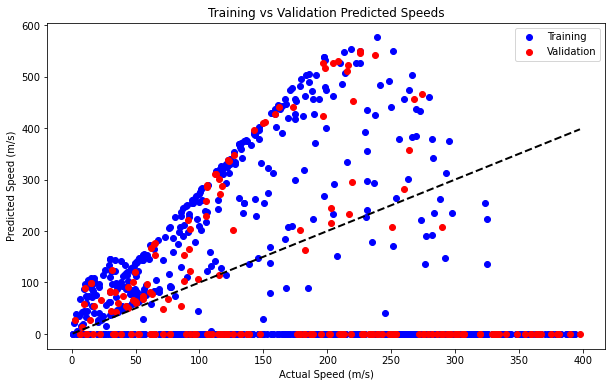

False


,id,expected
0,0,0.000000
1,1,0.000000
2,2,45.416454
3,3,0.000000
4,4,0.000000
5,5,479.014014
6,6,0.000000
7,7,440.687520
8,8,0.000000
9,9,276.250910


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


class GDShallowRELU:
  def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, SEED):
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.learning_rate = learning_rate

    np.random.seed(SEED) #initilizing the weights randomly with a seed to ensure repeatability
    self.W1 = np.random.uniform(-1, 1, (self.input_dim, self.hidden_dim))
    self.W2 = np.random.uniform(-1, 1, (self.hidden_dim, self.output_dim))

  def relu(self, x): #ReLU definition that is compatible with numpy arrays
    return np.maximum(0, x)
  
  def heaviside(self, x): #the derivative of the ReLU used in backpropagation
    return (x > 0).astype(x.dtype)
  
  def mse(self, y, y_pred): #manually defining the Mean Squared Error, shape gives the number of rows in y, dividing 2 to make the steps later on clearer
    return ((y - y_pred) ** 2) /  2

  def msre(self, y, y_pred): #Relative version of the Mean Squared Error
    return (((y - y_pred) / y) ** 2) /  (2 * y.shape[0])
  
  def forward(self, X): #forward pass using matrix multiplication for each of the 3 layers of the network
    self.Z1 = X @ self.W1 #inputs multiplied by first linear layer
    self.A1 = self.relu(self.Z1) #ReLU layer
    self.Z2 = self.A1  @ self.W2 #output from ReLU multiplied by second linear layer
    return self.Z2 #Returns the prediction
  
  def backward(self, X, y):

    dZ2 = -(y - self.Z2)/y #derivative of the MSE 

    dW2 = dZ2.T @ self.A1 #dot product between dZ2 and the ReLU output 

    dA1 = self.W2 @ dZ2.T

    dZ1 = self.heaviside(self.Z1).T * dA1 #dot between the derivative of the ReLU derivative calculated above

    dW1 = dZ1 @ X #dot product of the input and the layer above
    
    #update weights with the weight gradients calculated in the backpropagation
    self.W1 -= self.learning_rate * dW1.T 
    self.W2 -= self.learning_rate * dW2.T

  def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
    train_losses = []
    val_losses = []

    # Shuffle the training set
    permutation = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]

    for epoch in range(epochs):

      for i in range(0, len(X_train), batch_size): #create a batch with a number of data points corresponding to the batch size
        X_batch = X_train_shuffled[i:i+batch_size] 
        y_batch = y_train_shuffled[i:i+batch_size]

        pred_batch = self.forward(X_batch) #prediction on the batch
        train_loss_batch = np.mean(self.msre(y_batch, pred_batch)) #average loss from the batch 
        train_losses.append(train_loss_batch) #update the mse in the history

        self.backward(X_batch, y_batch) #calculate weight gradients

      val_pred_batch = self.forward(X_val) #predictions on the validation set
      val_loss_batch = np.mean(self.msre(y_val, val_pred_batch)) #batch MSE error
      val_losses.append(val_loss_batch) #update history
      
      if (epoch + 1) % 500 == 0: #print error every so and so epochs
        print(f'Epoch [{epoch + 1}/{epochs}], Loss (MSE) Train: {train_loss_batch:.6f}, RMSE Train: {np.sqrt(train_loss_batch):.6f}, MSE Val: {val_loss_batch:.6f}, RMSE Val: {np.sqrt(val_loss_batch):.6f}')

    return train_losses, val_losses


# Gravitational acceleration (m/s^2)
g = 9.80665  

SEED = 42

#assigning data to variables
data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lambda_w = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lambda_w))).T
y = c**2
y = y.reshape(-1, 1)  # Target is c^2

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

learning_rate = 1e-14
batch_size = 32
epochs = 10000
input_dim = 2
hidden_dim = 136
output_dim = 1

#create the model
model = GDShallowRELU(input_dim, hidden_dim, output_dim, learning_rate, SEED)
train_losses, val_losses = model.train(X_train, y_train, X_val, y_val, epochs, batch_size)

# Predictions and take the square root to return to c
y_pred_train = model.forward(X_train)
predicted_speeds_train = np.sqrt(np.maximum(y_pred_train.flatten(), 0))

y_pred_val = model.forward(X_val)
predicted_speeds_val = np.sqrt(np.maximum(y_pred_val.flatten(), 0))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(y_train), predicted_speeds_train, color='blue', label='Training')
plt.scatter(np.sqrt(y_val), predicted_speeds_val, color='red', label='Validation')
plt.plot([c.min(), c.max()], [c.min(), c.max()], 'k--', lw=2)
plt.xlabel('Actual Speed (m/s)')
plt.ylabel('Predicted Speed (m/s)')
plt.title('Training vs Validation Predicted Speeds')
plt.legend()
plt.show()


#Predicting the wave speeds that will be analyzed by kaggle
verification_data = pd.read_csv("water_waves_verification_data_input.csv")
h = verification_data.h.values
lam = verification_data.lam.values

X_verify = np.vstack((g * h, g * np.sqrt(h * lam))).T
y_verify = model.forward(X_verify)

expected_speed = model.forward(X_verify)

#Finding the expected speed
expected_speed = np.sqrt(np.maximum(expected_speed.flatten(), 0))

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed
})

# Check if submission has null values
print(submission.isnull().values.any())

# Print the submission DataFrame
submission[:10]

In [23]:
submission.to_csv("rohanrun.csv", index=False)